In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

### 1. Dataset

In [4]:
dataset = pd.read_csv("../datasets/mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [7]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

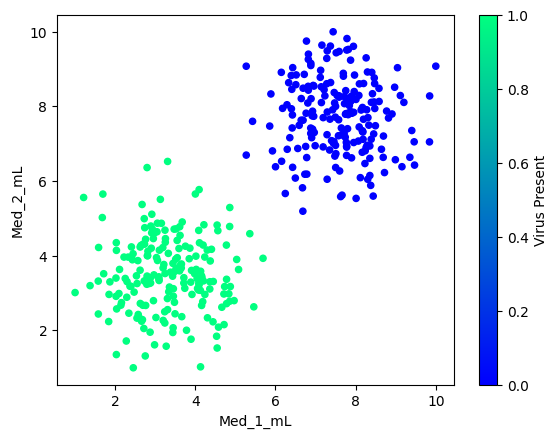

In [10]:
dataset.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

# Data Spliting

In [35]:
x_train , x_test ,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

### 2. Modèle


In [11]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [13]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [14]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [15]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [16]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [17]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [18]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

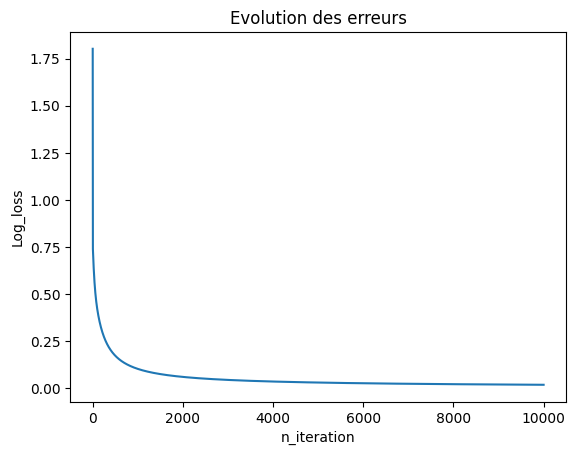

In [36]:
W,b=regression_logistique(x_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [38]:
from sklearn.metrics import accuracy_score
y_pred = predict(x_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[8.53148856e-03]
 [9.94466089e-01]
 [6.00975040e-03]
 [4.52202966e-04]
 [9.73317947e-01]
 [4.61705777e-04]
 [1.61917543e-02]
 [9.87610402e-01]
 [9.88779317e-01]
 [1.99260057e-03]
 [9.84608642e-01]
 [9.88868670e-01]
 [2.32737940e-03]
 [2.13177508e-03]
 [9.95174438e-01]
 [9.50712816e-01]
 [9.47214399e-01]
 [3.45102776e-03]
 [8.87213439e-01]
 [6.00244613e-03]
 [9.98014828e-01]
 [6.73399084e-04]
 [9.19367653e-04]
 [1.37663936e-02]
 [5.97288338e-03]
 [7.26270954e-04]
 [2.49868484e-04]
 [9.98569542e-01]
 [1.23820038e-02]
 [4.06462520e-03]
 [9.97224374e-01]
 [6.99022484e-01]
 [9.97295511e-01]
 [1.17127319e-03]
 [4.39384179e-03]
 [2.01675885e-03]
 [8.04859422e-01]
 [9.91711188e-01]
 [1.76141731e-02]
 [9.69496276e-03]
 [9.82894573e-01]
 [1.52753582e-03]
 [9.94119805e-01]
 [5.10833879e-03]
 [7.87506714e-04]
 [9.92824692e-01]
 [1.88711862e-02]
 [9.99351969e-01]
 [1.95723723e-04]
 [5.63521839e-04]
 [9.88010728e-01]
 [9.60311198e-01]
 [1.18997038e-03]
 [9.96802065e-01]
 [7.88260197e-03]
 [9.960405

[0.46736582]
[False]
[0.99999562]
[ True]
[0.99998913]
[ True]


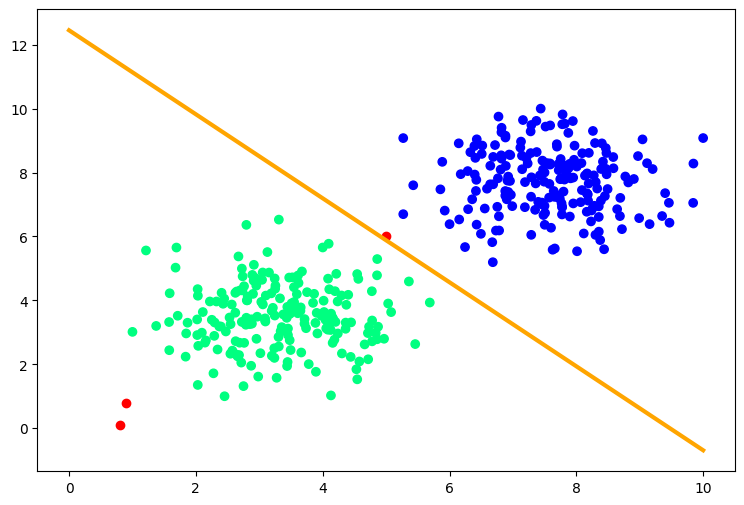

In [52]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([5,6])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [44]:
#Affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix
y_pred = predict(x_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8.53148856e-03]
 [9.94466089e-01]
 [6.00975040e-03]
 [4.52202966e-04]
 [9.73317947e-01]
 [4.61705777e-04]
 [1.61917543e-02]
 [9.87610402e-01]
 [9.88779317e-01]
 [1.99260057e-03]
 [9.84608642e-01]
 [9.88868670e-01]
 [2.32737940e-03]
 [2.13177508e-03]
 [9.95174438e-01]
 [9.50712816e-01]
 [9.47214399e-01]
 [3.45102776e-03]
 [8.87213439e-01]
 [6.00244613e-03]
 [9.98014828e-01]
 [6.73399084e-04]
 [9.19367653e-04]
 [1.37663936e-02]
 [5.97288338e-03]
 [7.26270954e-04]
 [2.49868484e-04]
 [9.98569542e-01]
 [1.23820038e-02]
 [4.06462520e-03]
 [9.97224374e-01]
 [6.99022484e-01]
 [9.97295511e-01]
 [1.17127319e-03]
 [4.39384179e-03]
 [2.01675885e-03]
 [8.04859422e-01]
 [9.91711188e-01]
 [1.76141731e-02]
 [9.69496276e-03]
 [9.82894573e-01]
 [1.52753582e-03]
 [9.94119805e-01]
 [5.10833879e-03]
 [7.87506714e-04]
 [9.92824692e-01]
 [1.88711862e-02]
 [9.99351969e-01]
 [1.95723723e-04]
 [5.63521839e-04]
 [9.88010728e-01]
 [9.60311198e-01]
 [1.18997038e-03]
 [9.96802065e-01]
 [7.88260197e-03]
 [9.960405

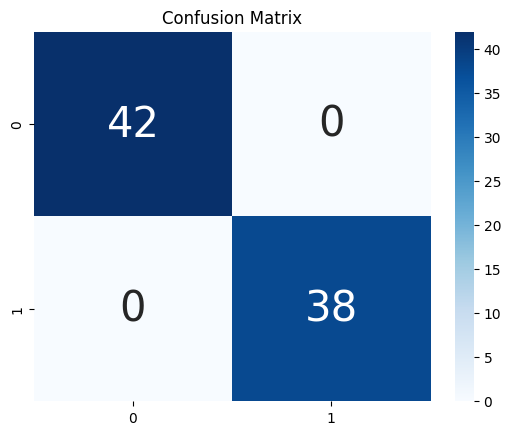

In [46]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [49]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(x_train, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[9.51142529e-01]
 [1.18542311e-02]
 [9.77031340e-01]
 [9.86503998e-01]
 [9.99422318e-01]
 [9.08647206e-04]
 [9.97936569e-01]
 [1.20599765e-01]
 [9.99331084e-01]
 [9.90891980e-01]
 [9.76502357e-01]
 [9.00108868e-04]
 [1.58952145e-01]
 [8.02478233e-01]
 [9.92381714e-01]
 [8.26820111e-03]
 [5.57147745e-04]
 [1.90939348e-03]
 [4.80106130e-03]
 [5.30739111e-03]
 [3.04606136e-03]
 [9.99859272e-01]
 [1.89319397e-02]
 [9.99874616e-01]
 [4.12859607e-04]
 [3.27670305e-03]
 [9.82956641e-01]
 [2.16832563e-03]
 [9.92180080e-01]
 [9.99289506e-01]
 [3.34293273e-03]
 [1.40455530e-02]
 [9.96790531e-01]
 [4.31944881e-03]
 [9.98756101e-01]
 [1.12246377e-03]
 [9.89685042e-01]
 [9.86291108e-01]
 [6.93909538e-05]
 [1.69855171e-03]
 [9.99289542e-01]
 [9.69487574e-01]
 [8.41780551e-03]
 [4.43873021e-03]
 [5.63468016e-02]
 [9.80933860e-01]
 [1.24087798e-02]
 [9.96662492e-01]
 [2.50886238e-02]
 [7.36523105e-03]
 [9.97009371e-01]
 [2.17578592e-01]
 [9.98791133e-01]
 [1.15447636e-03]
 [9.86566377e-01]
 [9.723923

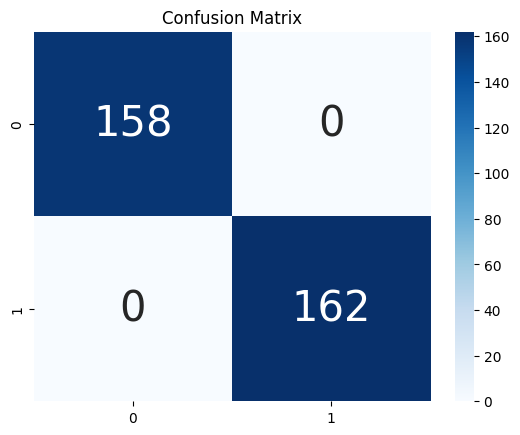

In [50]:
# Plot confusion matrix
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()